In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.kernel_approximation import RBFSampler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error)
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (precision_score, recall_score,f1_score, accuracy_score,mean_squared_error,mean_absolute_error, roc_curve, classification_report,auc)
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('UNSW_NB15.csv')

In [3]:
data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [4]:
data.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [5]:
np.unique(data['service'],return_counts = True)

(array(['-', 'dhcp', 'dns', 'ftp', 'ftp-data', 'http', 'irc', 'pop3',
        'radius', 'smtp', 'snmp', 'ssh', 'ssl'], dtype=object),
 array([94168,    94, 47294,  3428,  3995, 18724,    25,  1105,    12,
         5058,    80,  1302,    56], dtype=int64))

In [3]:
data = data[data['service']!='-']

In [7]:
np.unique(data['service'],return_counts = True)

(array(['dhcp', 'dns', 'ftp', 'ftp-data', 'http', 'irc', 'pop3', 'radius',
        'smtp', 'snmp', 'ssh', 'ssl'], dtype=object),
 array([   94, 47294,  3428,  3995, 18724,    25,  1105,    12,  5058,
           80,  1302,    56], dtype=int64))

In [8]:
data.columns

Index(['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

In [9]:
data.shape

(81173, 45)

In [4]:
features = pd.read_csv('UNSW_NB15_features.csv')
features

,No.,Name,Type,Description
0,1,srcip,nominal,Source IP address
1,2,sport,integer,Source port number
2,3,dstip,nominal,Destination IP address
3,4,dsport,integer,Destination port number
4,5,proto,nominal,Transaction protocol
5,6,state,nominal,Indicates to the state and its dependent proto...
6,7,dur,Float,Record total duration
7,8,sbytes,Integer,Source to destination transaction bytes
8,9,dbytes,Integer,Destination to source transaction bytes
9,10,sttl,Integer,Source to destination time to live value


In [11]:
features.columns

Index(['No.', 'Name', 'Type ', 'Description'], dtype='object')

In [12]:
features['Type '].unique()

array(['nominal', 'integer', 'Float', 'Integer', 'Timestamp', 'Binary',
       'binary'], dtype=object)

In [5]:
features['Type '] = features['Type '].str.lower()

In [14]:
features['Type '].unique()

array(['nominal', 'integer', 'float', 'timestamp', 'binary'], dtype=object)

In [6]:
column_store = {
                    "nominal" : [],
                    "integer" : [],
                    "float"   : [],
                    "timestamp" : [],
                    "binary" : []
}

In [7]:
for line in range(features.shape[0]):
    column_store[features['Type '].iloc[line]].append(features['Name'].iloc[line])

In [9]:
org_cols = data.columns

In [10]:
for col in column_store:
    column_store[col] = org_cols.intersection(column_store[col])

In [19]:
column_store

{'nominal': Index(['proto', 'service', 'state', 'attack_cat'], dtype='object'),
 'integer': Index(['sbytes', 'dbytes', 'sttl', 'dttl', 'sloss', 'dloss', 'swin', 'stcpb',
        'dtcpb', 'dwin', 'trans_depth', 'ct_srv_src', 'ct_state_ttl',
        'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
        'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_srv_dst'],
       dtype='object'),
 'float': Index(['dur', 'tcprtt', 'synack', 'ackdat'], dtype='object'),
 'timestamp': Index([], dtype='object'),
 'binary': Index(['is_ftp_login', 'is_sm_ips_ports'], dtype='object')}

In [11]:
for col in column_store:
    if col == "nominal" or col == "timestamp":
        continue;
    for col_ in column_store[col]:
        pd.to_numeric(data[col_])

In [21]:
## Data Viz

In [22]:
### checking Label Binary classification

In [12]:
np.unique(data['label'],return_counts=True)

(array([0, 1], dtype=int64), array([19488, 61685], dtype=int64))

In [115]:
x,y = np.unique(data['label'],return_counts=True)

In [116]:
x = ['Normal','Abnormal']
y = list(y)

In [117]:
def draw_(x,y,tle,xla,yla,l,b):
    fig, ax = plt.subplots(figsize = (l,b))
    ax.bar(x,y,width=0.8)
    for index,data in enumerate(y):
        plt.text(x=index , y =data+1 , s=f"{data}" , fontdict=dict(fontsize=10))
    plt.xlabel(xla)
    plt.ylabel(yla)
    plt.title(tle)
    plt.savefig('plots/'+tle+'.png',bbox_inches = 'tight')
    plt.show()

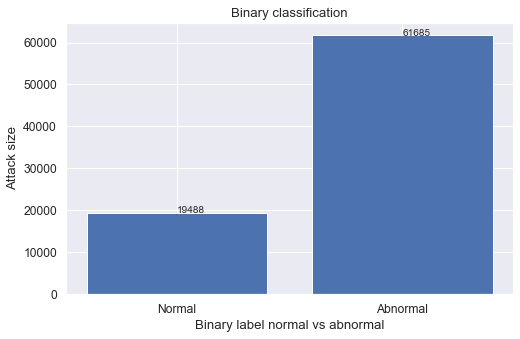

In [118]:
draw_(x,y,"Binary classification","Binary label normal vs abnormal","Attack size",8,5)

In [119]:
## multi class classification

In [13]:
np.unique(data['attack_cat'],return_counts=True)

(array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
        'Normal', 'Reconnaissance', 'Worms'], dtype=object),
 array([  564,    99,  1791, 16187,  1731, 39496, 19488,  1703,   114],
       dtype=int64))

In [120]:
x,y = np.unique(data['attack_cat'],return_counts=True)

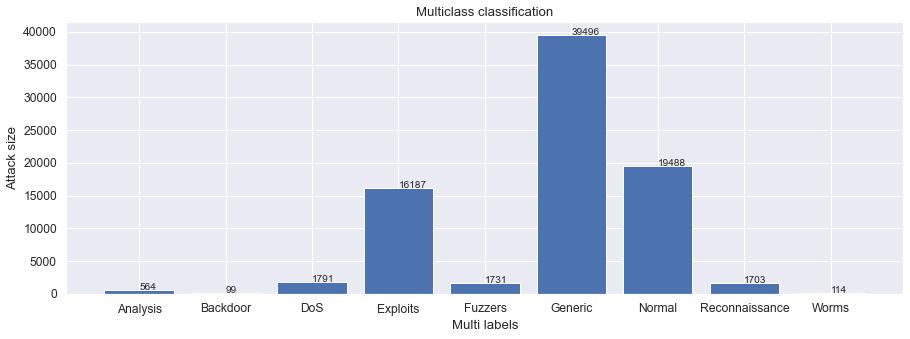

In [121]:
draw_(x,y,"Multiclass classification","Multi labels","Attack size",15,5)

In [30]:
## Encoding

In [14]:
save = list(data.dtypes == object)

In [15]:
cat_cols = []
all_cols = data.columns
for i in range(len(save)):
    if save[i] == True:
        cat_cols.append(all_cols[i])

In [16]:
cat_cols = cat_cols[:-1]
cat_cols

['proto', 'service', 'state']

In [17]:
data_cat = data[cat_cols]

In [35]:
data_cat

,proto,service,state
3,tcp,ftp,FIN
11,tcp,smtp,FIN
15,udp,snmp,INT
17,tcp,http,FIN
21,tcp,http,FIN
...,...,...,...
175335,udp,dns,INT
175336,udp,dns,INT
175338,udp,dns,INT
175339,udp,dns,INT


In [18]:
data_cat = pd.get_dummies(data_cat)

In [37]:
data_cat

,proto_tcp,proto_udp,service_dhcp,service_dns,service_ftp,service_ftp-data,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
11,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
15,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
17,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
21,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
175336,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
175338,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
175339,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [19]:
data = pd.concat([data, data_cat],axis=1)

In [20]:
data = data.drop(columns=cat_cols)

In [21]:
data.shape

(81173, 61)

In [41]:
## Normalization

In [22]:
save = list(data.dtypes != object)

In [23]:
num_cols = []
all_cols = data.columns
for i in range(len(save)):
    if all_cols[i] == 'id' or all_cols[i] == 'label':
        continue
    elif save[i] == True:
        num_cols.append(all_cols[i])
    else:
        print(all_cols[i])

attack_cat


In [24]:
print(num_cols)

['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'proto_tcp', 'proto_udp', 'service_dhcp', 'service_dns', 'service_ftp', 'service_ftp-data', 'service_http', 'service_irc', 'service_pop3', 'service_radius', 'service_smtp', 'service_snmp', 'service_ssh', 'service_ssl', 'state_CON', 'state_FIN', 'state_INT', 'state_REQ', 'state_RST']


In [25]:
# using minmax scaler for normalizing data
def normalize_the_dataframe(df,cols):
    minmax_scale = MinMaxScaler(feature_range=(0, 1))
    for col in cols:
        arr = df[col]
        arr = np.array(arr)
        df[col] = minmax_scale.fit_transform(arr.reshape(len(arr),1))
    return df

In [26]:
data[:5]

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,...,0,0,0,0,0,0,1,0,0,0
11,12,2.093085,62,28,56329,2212,42.520967,62,252,2.118251e+05,...,0,1,0,0,0,0,1,0,0,0
15,16,0.000002,2,0,138,0,500000.001300,254,0,2.760000e+08,...,0,0,1,0,0,0,0,1,0,0
17,18,0.393556,10,8,860,1096,43.195886,62,252,1.573347e+04,...,0,0,0,0,0,0,1,0,0,0
21,22,0.338017,10,6,998,268,44.376468,254,252,2.127704e+04,...,0,0,0,0,0,0,1,0,0,0


In [27]:
data = normalize_the_dataframe(data.copy(),num_cols)

In [28]:
data[:-5]

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
3,4,2.802780e-02,0.001144,0.001093,0.000041,0.000053,0.000014,0.138393,0.992126,0.000001,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,12,3.488529e-02,0.006344,0.002551,0.004337,0.000151,0.000043,0.138393,0.992126,0.000092,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
15,16,1.666693e-08,0.000104,0.000000,0.000003,0.000000,0.500000,0.995536,0.000000,0.119792,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
17,18,6.559354e-03,0.000936,0.000729,0.000059,0.000075,0.000043,0.138393,0.992126,0.000007,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
21,22,5.633690e-03,0.000936,0.000547,0.000069,0.000018,0.000044,0.995536,0.992126,0.000009,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175330,175331,1.333355e-07,0.000104,0.000000,0.000001,0.000000,0.111111,0.995536,0.000000,0.021991,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175331,175332,1.166685e-07,0.000104,0.000000,0.000001,0.000000,0.125000,0.995536,0.000000,0.024740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175332,175333,1.166685e-07,0.000104,0.000000,0.000001,0.000000,0.125000,0.995536,0.000000,0.024740,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
175333,175334,8.333466e-08,0.000104,0.000000,0.000001,0.000000,0.166667,0.995536,0.000000,0.032986,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [29]:
## Label Encoding

In [33]:
### Binary labels

In [31]:
bin_lb = []
for i in range(data.shape[0]):
    if data['label'].iloc[i]==0:
        bin_lb.append('normal')
    else:
        bin_lb.append('abnormal')

In [32]:
np.unique(bin_lb,return_counts=True)

(array(['abnormal', 'normal'], dtype='<U8'),
 array([61685, 19488], dtype=int64))

In [53]:
binary_data = data.copy()

In [54]:
binary_data['label'] = bin_lb

In [55]:
le1 = LabelEncoder()
binary_data['label'] = le1.fit_transform(binary_data['label'])

In [56]:
le1.classes_

array(['abnormal', 'normal'], dtype=object)

In [57]:
### Multi class labels

In [58]:
# one-hot-encoding attack label
multiclass_data = data.copy()
multiclass_label = pd.DataFrame(multiclass_data.attack_cat)
multiclass_data = pd.get_dummies(multiclass_data,columns=['attack_cat'])
# label encoding (0,1,2,3,4,5,6,7,8) multi-class labels
# ['Analysis0', 'Backdoor1', 'DoS2', 'Exploits3', 'Fuzzers4', 'Generic5','Normal6', 'Reconnaissance7', 'Worms8']
le2 = LabelEncoder()
enc_label = multiclass_label.apply(le2.fit_transform)
multiclass_data['label'] = enc_label
le2.classes_

array(['Analysis', 'Backdoor', 'DoS', 'Exploits', 'Fuzzers', 'Generic',
       'Normal', 'Reconnaissance', 'Worms'], dtype=object)

In [59]:
print(num_cols)

['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'proto_tcp', 'proto_udp', 'service_dhcp', 'service_dns', 'service_ftp', 'service_ftp-data', 'service_http', 'service_irc', 'service_pop3', 'service_radius', 'service_smtp', 'service_snmp', 'service_ssh', 'service_ssl', 'state_CON', 'state_FIN', 'state_INT', 'state_REQ', 'state_RST']


In [60]:
# Feature Selection Correlation

In [61]:
#Binary label 

In [62]:
num_cols.append('label')

In [63]:
corr_bin = binary_data[num_cols].corr()

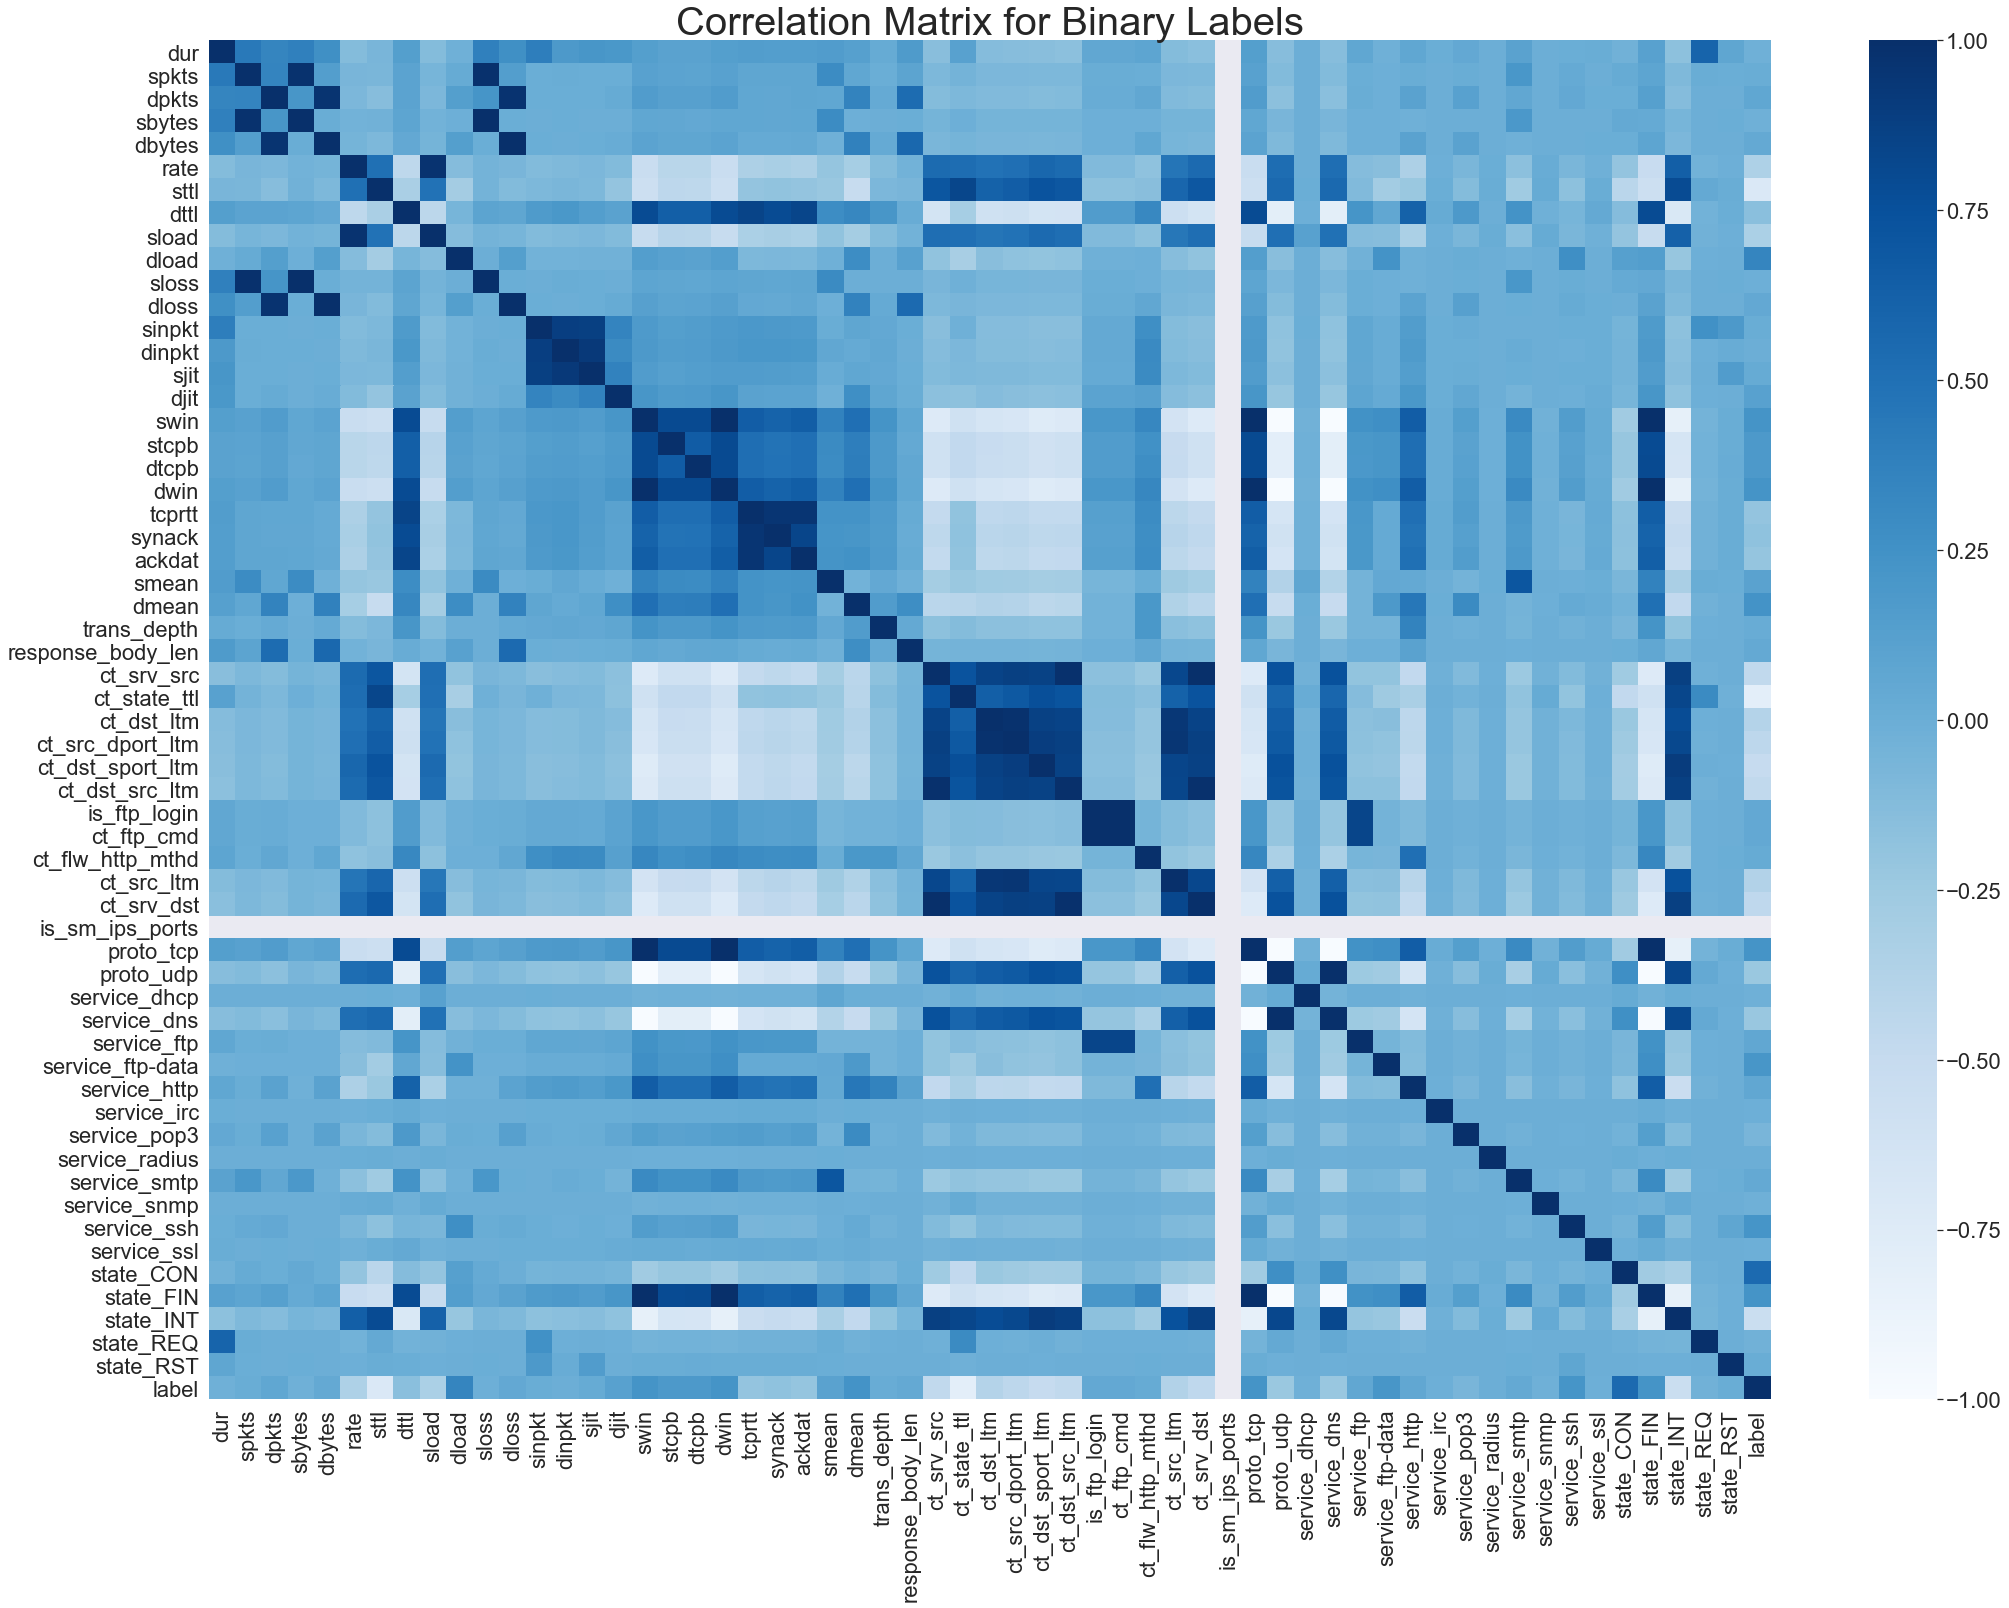

In [106]:
# Correlation Matrix for Binary Labels
plt.figure(figsize=(35,25))
sns.set(font_scale=2)
sns.heatmap(corr_bin,vmax=1.0,annot=False,cmap="Blues")
plt.title('Correlation Matrix for Binary Labels',fontsize=40)
plt.savefig('plots/correlation_matrix_binary_data.png')
plt.show()

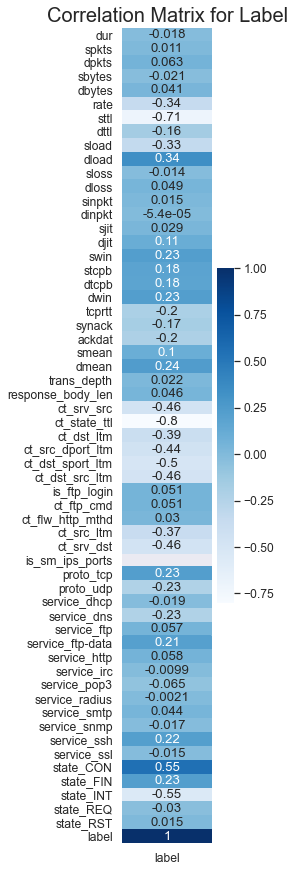

In [111]:
plt.figure(figsize=(2,15))
sns.set(font_scale=1.1)
lb_bin = pd.DataFrame({"label": corr_bin['label']},
                  index=corr_bin.columns)
# sns.heatmap(df, annot=True, fmt="g", cmap='viridis')
sns.heatmap(lb_bin,vmax=1.0,annot=True,cmap="Blues")
plt.title('Correlation Matrix for Label',fontsize=20)
plt.savefig('plots/correlation_matrix_binary_data_label.png', bbox_inches = 'tight')
plt.show()

In [84]:
highest_corr_bin = corr_bin[abs(corr_bin['label']) >= 0.30]

In [88]:
highest_corr_bin['label'].index

Index(['rate', 'sttl', 'sload', 'dload', 'ct_srv_src', 'ct_state_ttl',
       'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'ct_src_ltm', 'ct_srv_dst', 'state_CON', 'state_INT', 'label'],
      dtype='object')

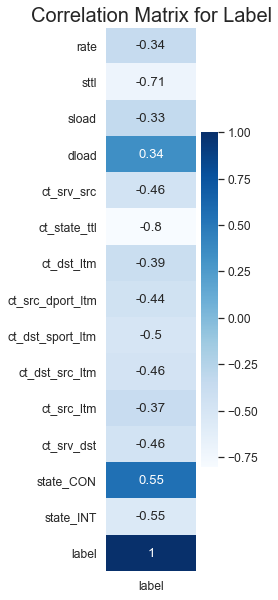

In [98]:
plt.figure(figsize=(2,10))
sns.set(font_scale=1.1)
lb_bin = pd.DataFrame({"label": highest_corr_bin['label']},
                  index=highest_corr_bin['label'].index)
sns.heatmap(lb_bin,vmax=1.0,annot=True,cmap="Blues")
plt.title('Correlation Matrix for Label',fontsize=20)
plt.savefig('plots/correlation_matrix_binary_data_label_gte_0_3.png', bbox_inches = 'tight')
plt.show()

In [100]:
highest_corr_bin['label']

rate               -0.344535
sttl               -0.707337
sload              -0.334562
dload               0.343910
ct_srv_src         -0.463153
ct_state_ttl       -0.801403
ct_dst_ltm         -0.387358
ct_src_dport_ltm   -0.444874
ct_dst_sport_ltm   -0.497234
ct_dst_src_ltm     -0.463735
ct_src_ltm         -0.368486
ct_srv_dst         -0.459984
state_CON           0.552505
state_INT          -0.546631
label               1.000000
Name: label, dtype: float64

In [101]:
binary_cols = highest_corr_bin.index

In [102]:
# Binary labelled Dataset
binary_data = binary_data[binary_cols].copy()
binary_data

,rate,sttl,sload,dload,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,state_CON,state_INT,label
3,0.000014,0.138393,0.000001,0.000150,0.000000,0.166667,0.02,0.00,0.000000,0.039216,0.016949,0.000000,0.0,0.0,1
11,0.000043,0.138393,0.000092,0.000364,0.019608,0.166667,0.00,0.00,0.000000,0.019608,0.000000,0.000000,0.0,0.0,1
15,0.500000,0.995536,0.119792,0.000000,0.000000,0.333333,0.00,0.00,0.000000,0.058824,0.016949,0.000000,0.0,1.0,1
17,0.000043,0.138393,0.000007,0.000869,0.039216,0.166667,0.00,0.00,0.000000,0.019608,0.000000,0.039216,0.0,0.0,1
21,0.000044,0.995536,0.000009,0.000236,0.098039,0.166667,0.00,0.00,0.000000,0.000000,0.016949,0.039216,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,0.166667,0.995536,0.032986,0.000000,0.862745,0.333333,0.64,0.64,0.533333,0.862745,0.542373,0.862745,0.0,1.0,0
175336,0.111111,0.995536,0.021991,0.000000,0.450980,0.333333,0.46,0.46,0.400000,0.450980,0.389831,0.450980,0.0,1.0,0
175338,0.111111,0.995536,0.021991,0.000000,0.215686,0.333333,0.04,0.04,0.066667,0.235294,0.033898,0.215686,0.0,1.0,0
175339,0.111111,0.995536,0.021991,0.000000,0.568627,0.333333,0.58,0.58,0.433333,0.568627,0.491525,0.568627,0.0,1.0,0


In [82]:
binary_data.to_csv('binary_data.csv')

In [83]:
#multiclass labels

In [103]:
multi_num_col = list( multiclass_data.columns)

In [104]:
corr_multiclass = multiclass_data[multi_num_col].corr()

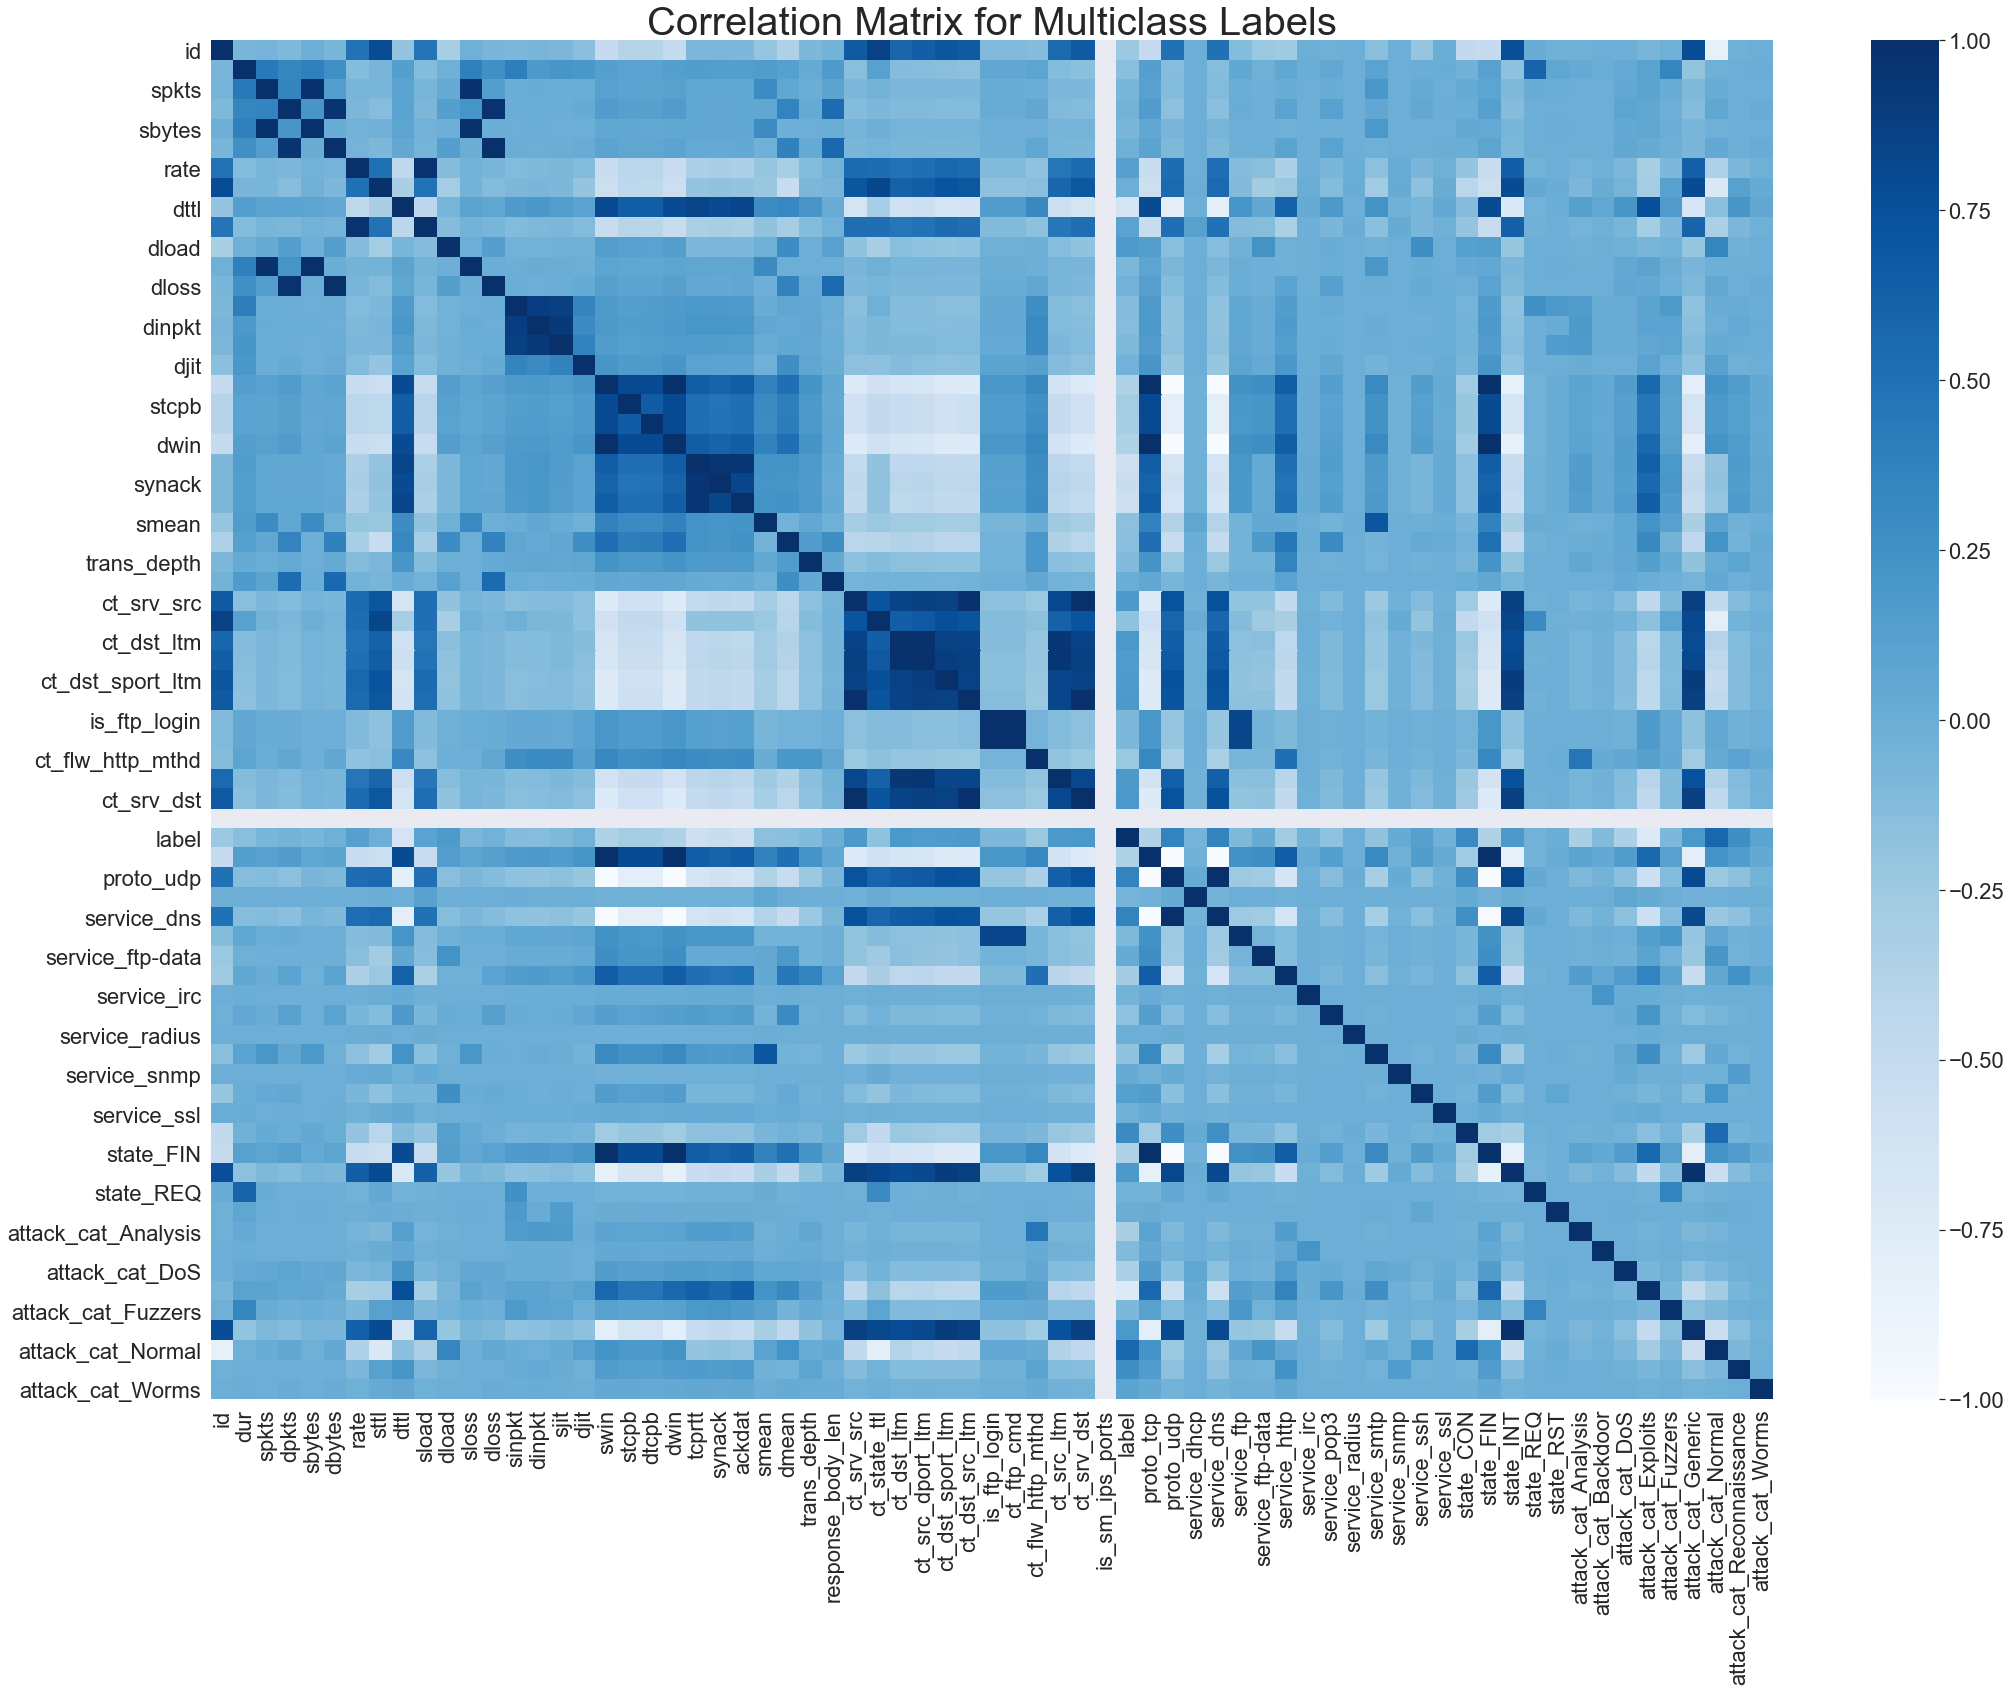

In [107]:
# Correlation Matrix for Binary Labels
plt.figure(figsize=(35,25))
sns.set(font_scale=2)
sns.heatmap(corr_multiclass,vmax=1.0,annot=False,cmap="Blues")
plt.title('Correlation Matrix for Multiclass Labels',fontsize=40)
plt.savefig('plots/correlation_matrix_multiclass_data.png',bbox_inches = 'tight')
plt.show()

In [108]:
highest_corr_multiclass = corr_multiclass[abs(corr_multiclass['label']) >= 0.30]

In [109]:
highest_corr_multiclass['label']

dttl                  -0.646589
swin                  -0.364393
dwin                  -0.364393
tcprtt                -0.570205
synack                -0.524027
ackdat                -0.570098
label                  1.000000
proto_tcp             -0.364393
proto_udp              0.364393
service_dns            0.365346
state_CON              0.302853
state_FIN             -0.361750
attack_cat_Analysis   -0.326209
attack_cat_DoS        -0.339669
attack_cat_Exploits   -0.719733
attack_cat_Normal      0.570858
Name: label, dtype: float64

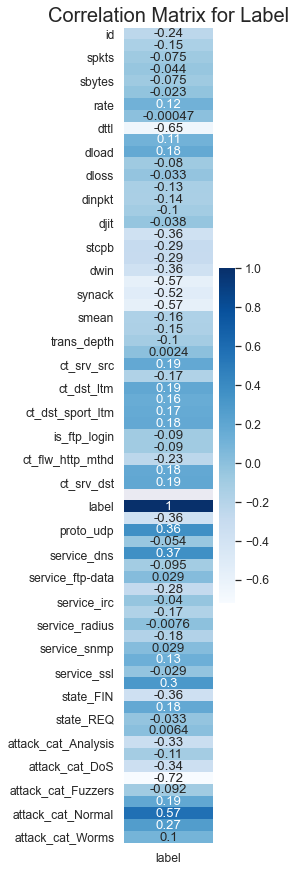

In [112]:
plt.figure(figsize=(2,15))
sns.set(font_scale=1.1)
lb_bin = pd.DataFrame({"label": corr_multiclass['label']},
                  index=corr_multiclass.columns)
# sns.heatmap(df, annot=True, fmt="g", cmap='viridis')
sns.heatmap(lb_bin,vmax=1.0,annot=True,cmap="Blues")
plt.title('Correlation Matrix for Label',fontsize=20)
plt.savefig('plots/correlation_matrix_multiclass_data_label.png', bbox_inches = 'tight')
plt.show()

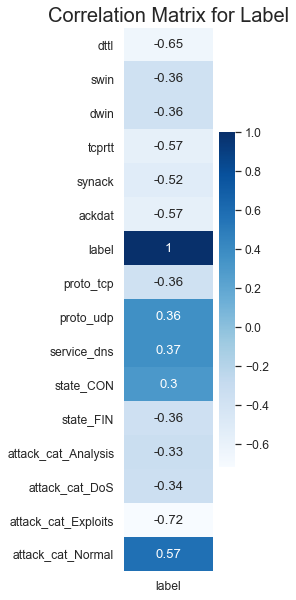

In [113]:
plt.figure(figsize=(2,10))
sns.set(font_scale=1.1)
lb_bin = pd.DataFrame({"label": highest_corr_multiclass['label']},
                  index=highest_corr_multiclass['label'].index)
sns.heatmap(lb_bin,vmax=1.0,annot=True,cmap="Blues")
plt.title('Correlation Matrix for Label',fontsize=20)
plt.savefig('plots/correlation_matrix_multiclass_data_label_gte_0_3.png', bbox_inches = 'tight')
plt.show()

In [98]:
multiclass_cols = highest_corr_multiclass.index
multiclass_data = multiclass_data[multiclass_cols].copy()
multiclass_data

,dttl,swin,dwin,tcprtt,synack,ackdat,label,proto_tcp,proto_udp,service_dns,state_CON,state_FIN,attack_cat_Analysis,attack_cat_DoS,attack_cat_Exploits,attack_cat_Normal
3,0.992126,1.0,1.0,0.000000,0.000000,0.000000,6,1.0,0.0,0.0,0.0,1.0,0,0,0,1
11,0.992126,1.0,1.0,0.087972,0.103000,0.054975,6,1.0,0.0,0.0,0.0,1.0,0,0,0,1
15,0.000000,0.0,0.0,0.000000,0.000000,0.000000,6,0.0,1.0,0.0,0.0,0.0,0,0,0,1
17,0.992126,1.0,1.0,0.080709,0.115373,0.042914,6,1.0,0.0,0.0,0.0,1.0,0,0,0,1
21,0.992126,1.0,1.0,0.103597,0.107399,0.069747,6,1.0,0.0,0.0,0.0,1.0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175335,0.000000,0.0,0.0,0.000000,0.000000,0.000000,5,0.0,1.0,1.0,0.0,0.0,0,0,0,0
175336,0.000000,0.0,0.0,0.000000,0.000000,0.000000,5,0.0,1.0,1.0,0.0,0.0,0,0,0,0
175338,0.000000,0.0,0.0,0.000000,0.000000,0.000000,5,0.0,1.0,1.0,0.0,0.0,0,0,0,0
175339,0.000000,0.0,0.0,0.000000,0.000000,0.000000,5,0.0,1.0,1.0,0.0,0.0,0,0,0,0


In [99]:
multiclass_data.to_csv('multiclass_data.csv')